In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Bank_churn.csv')

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.6

In [5]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
         rownumber    customerid   creditscore           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             balance  numofproducts    hascrcard  isactivemember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

In [7]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'churn'],
      dtype='object')


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
churn              0
dtype: int64


In [9]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [10]:
df = df.drop_duplicates()

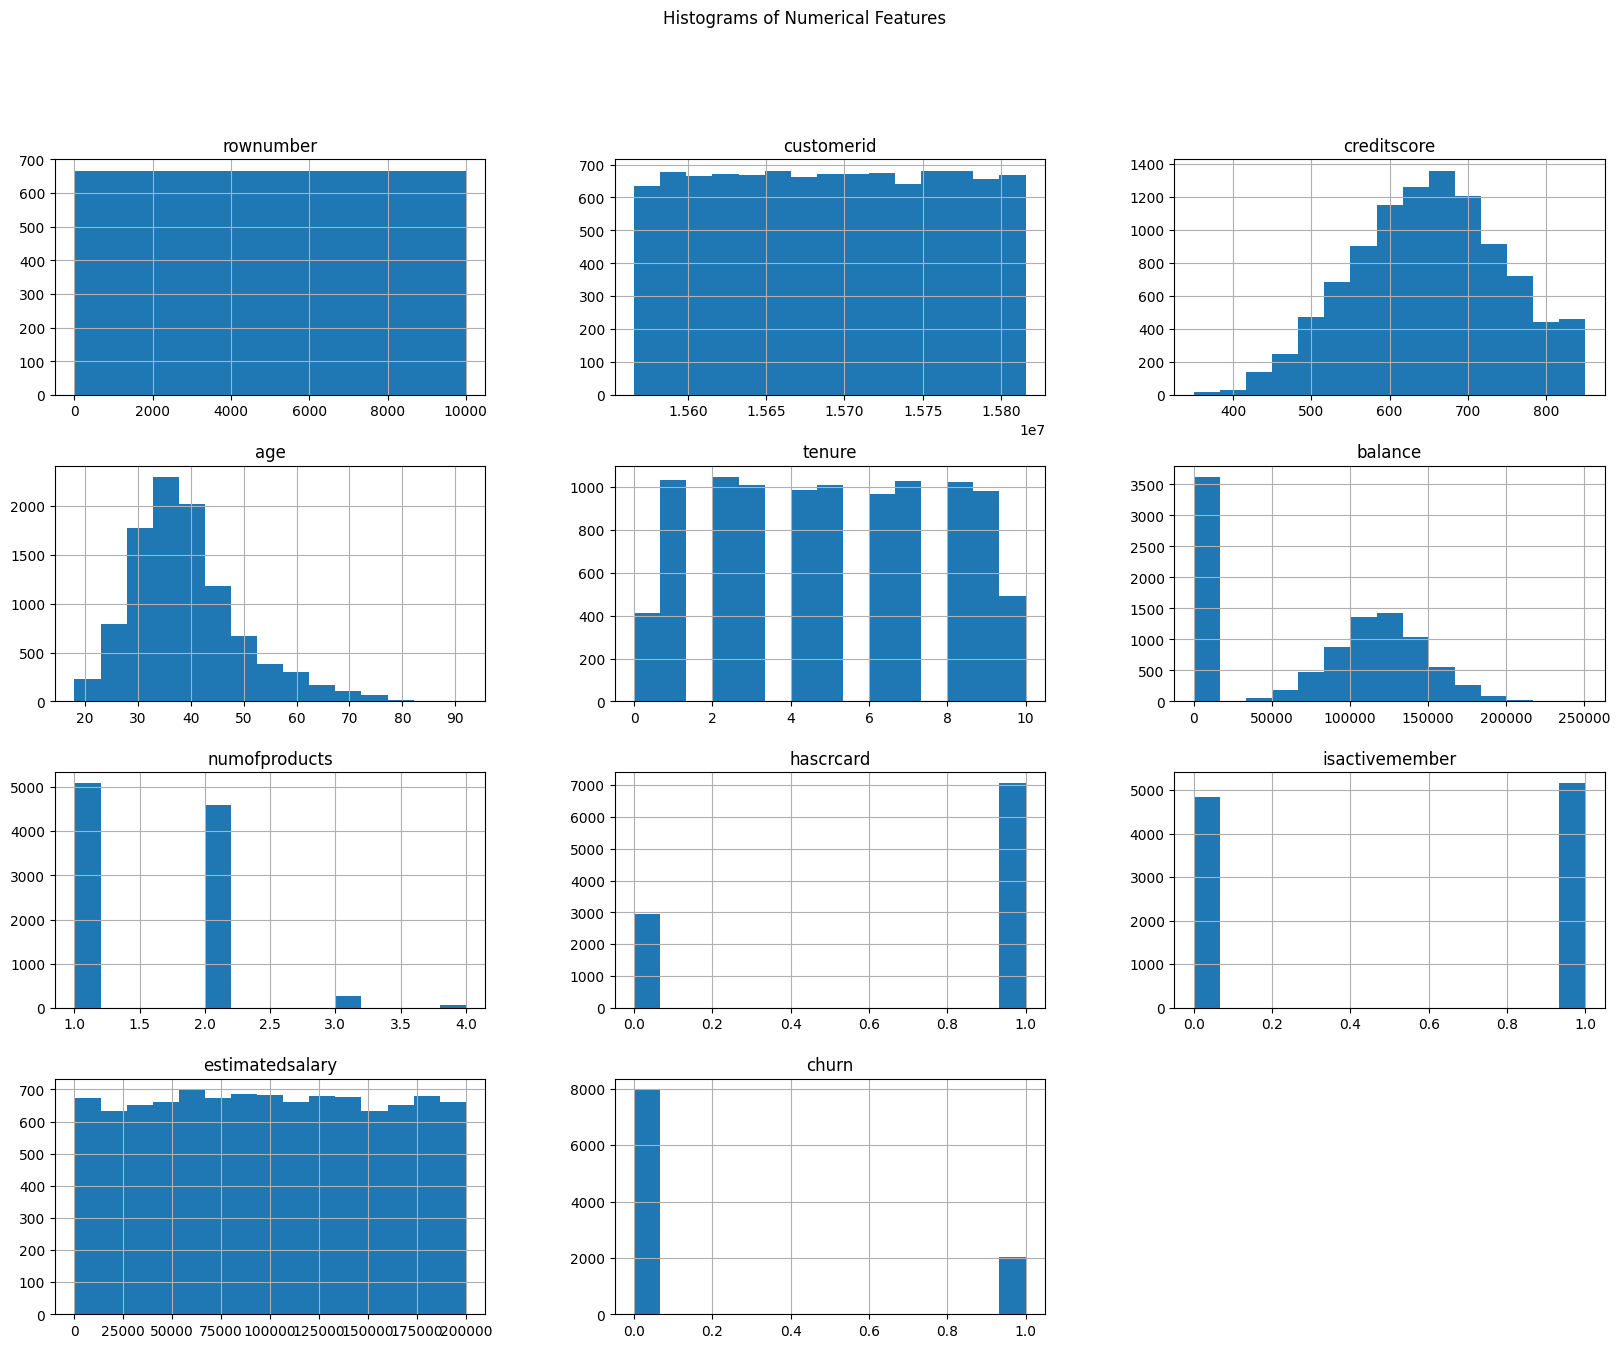

In [11]:
# Plotting histograms for numerical features
df.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

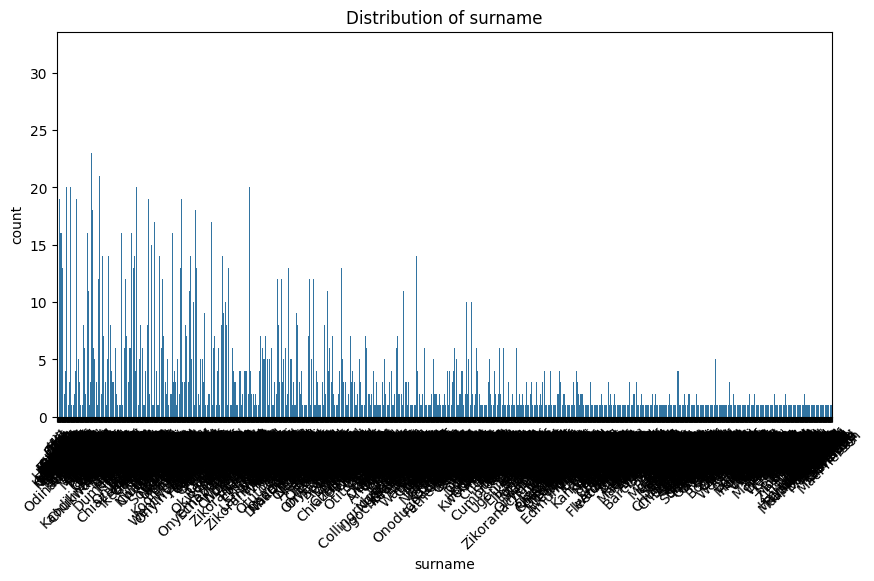

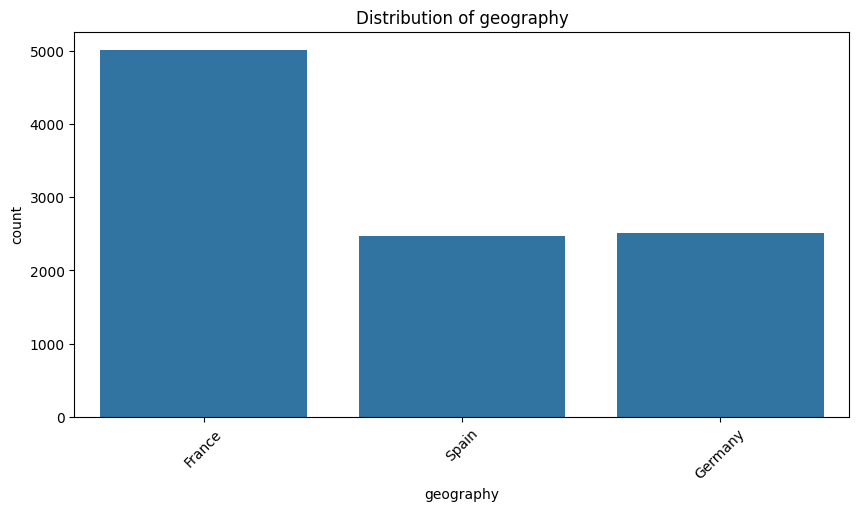

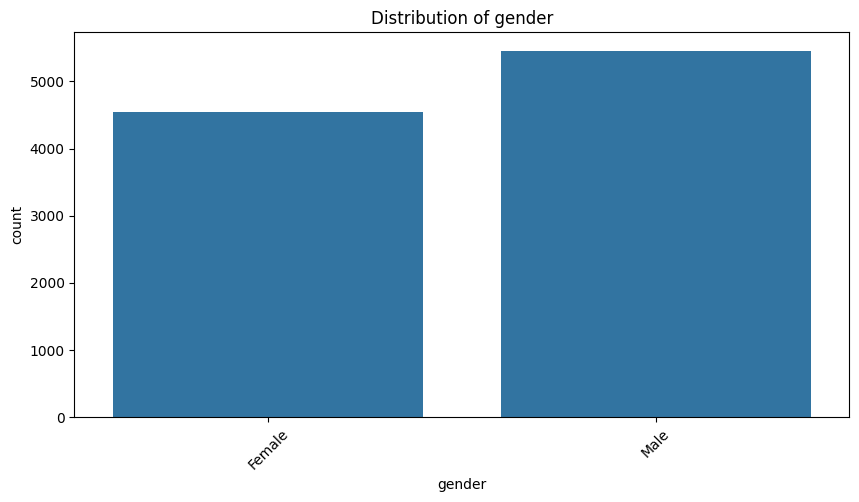

In [12]:
# Checking the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

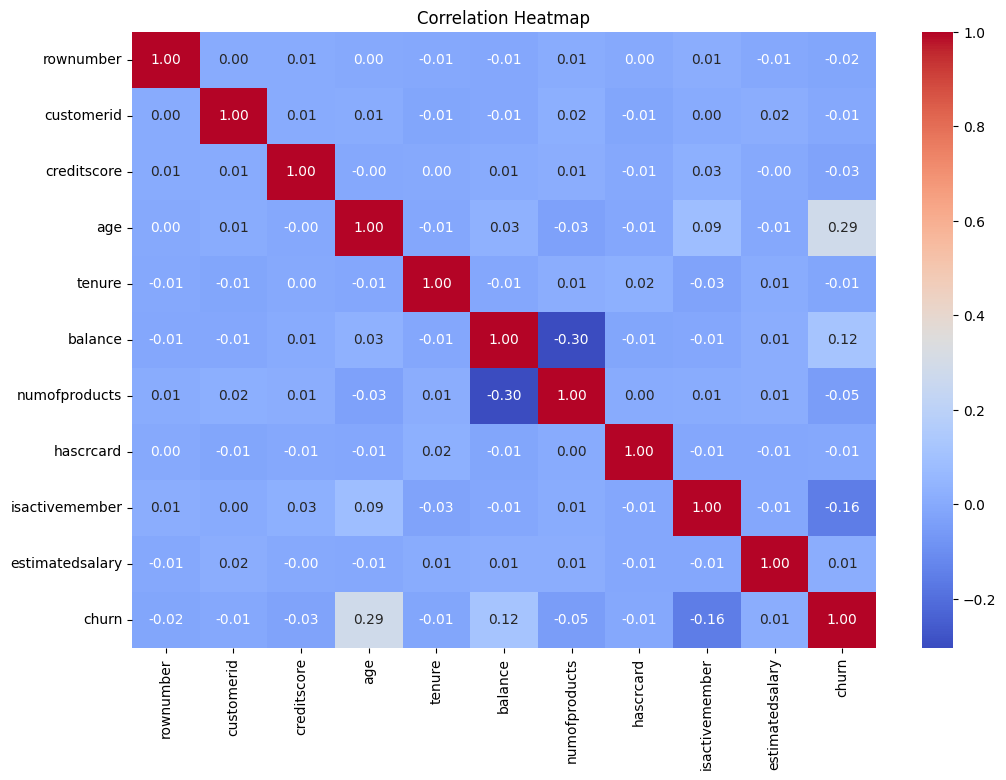

In [14]:
# Bivariate Analysis: Analyzing relationships between two variables
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

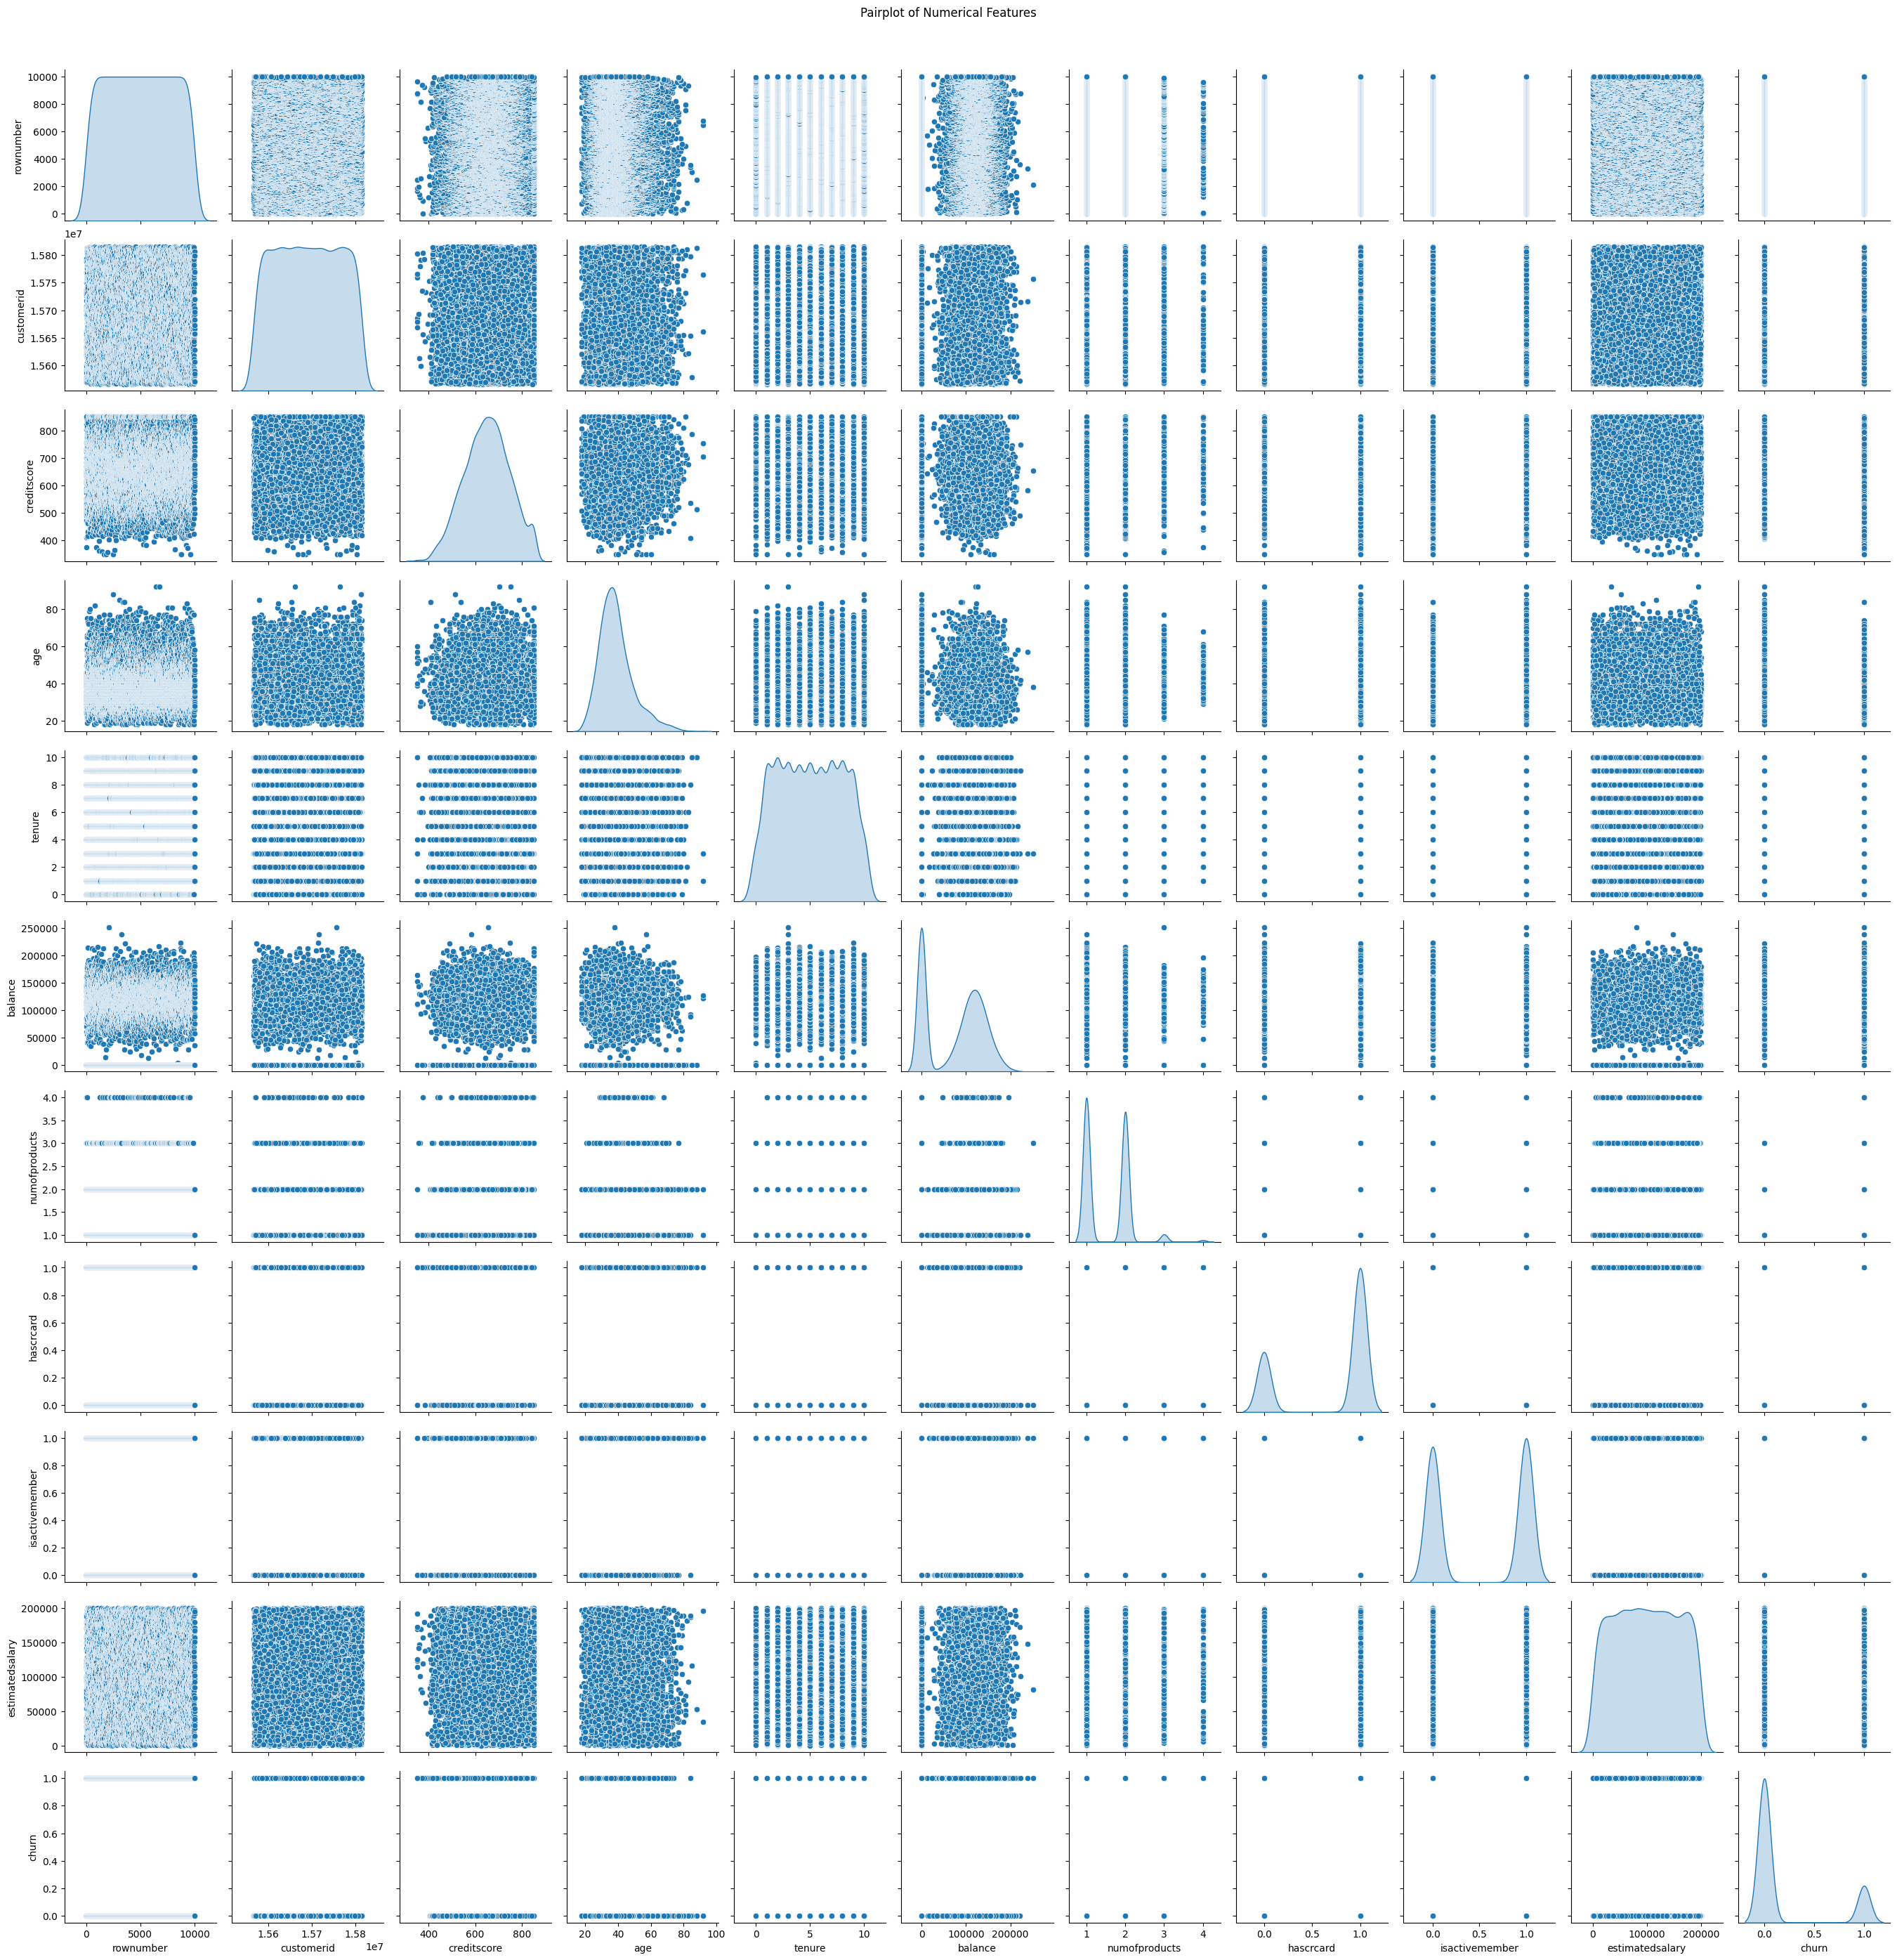

In [15]:
# Pairplot to see relationships between numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

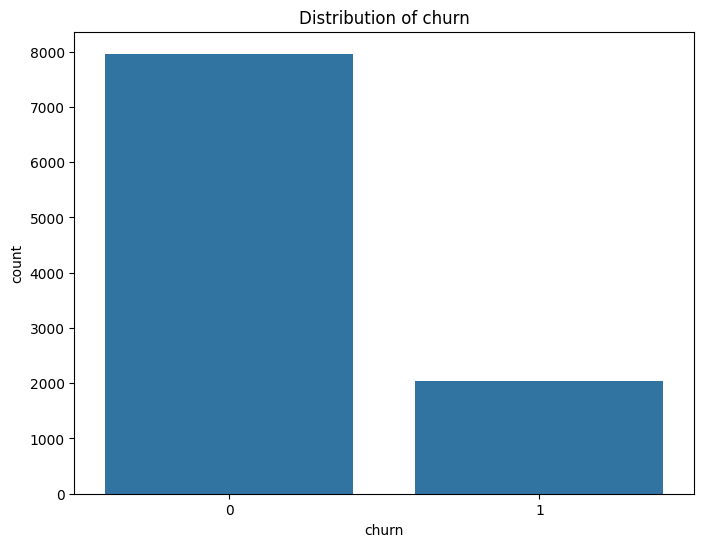

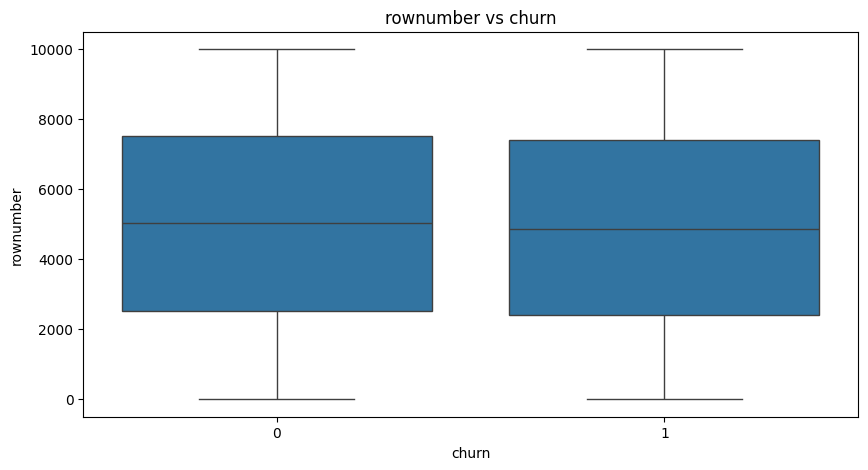

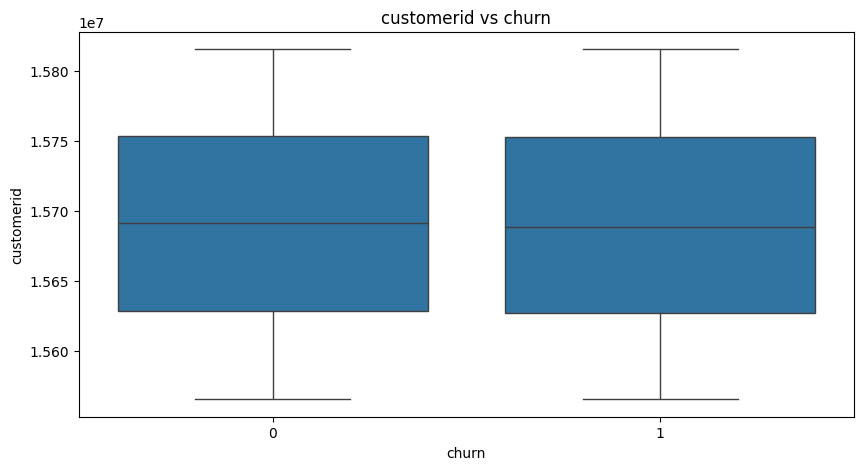

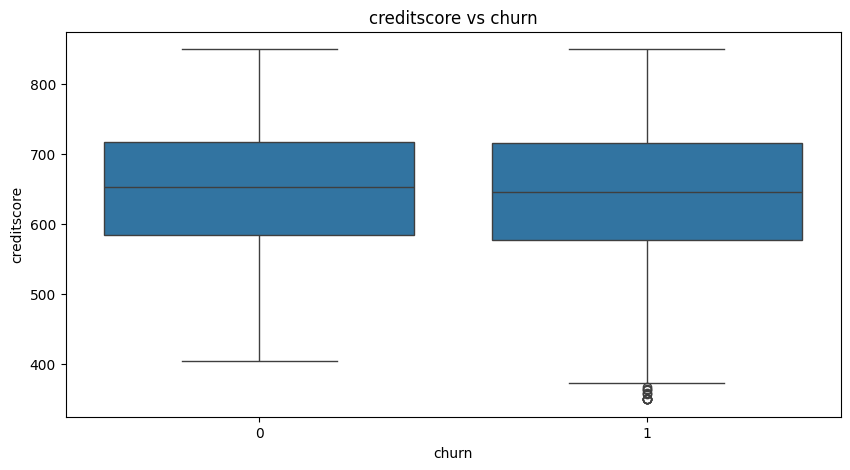

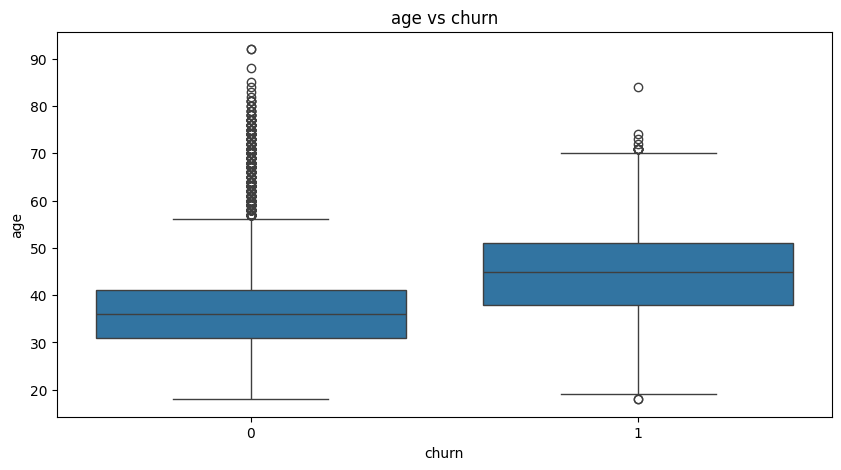

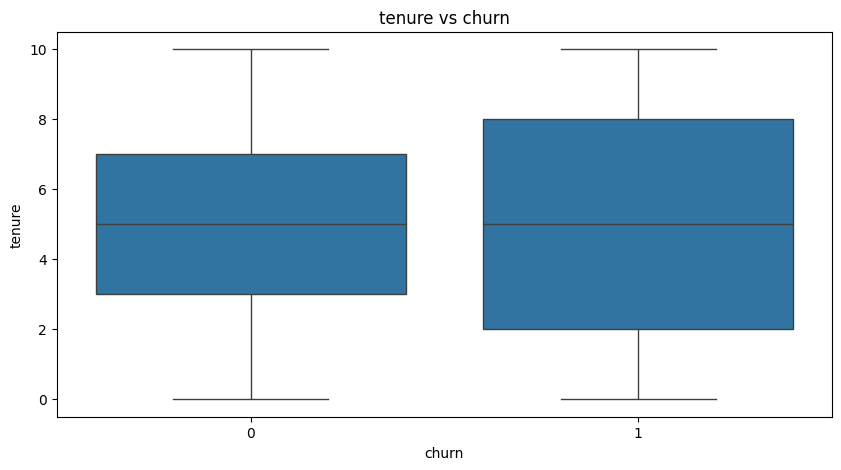

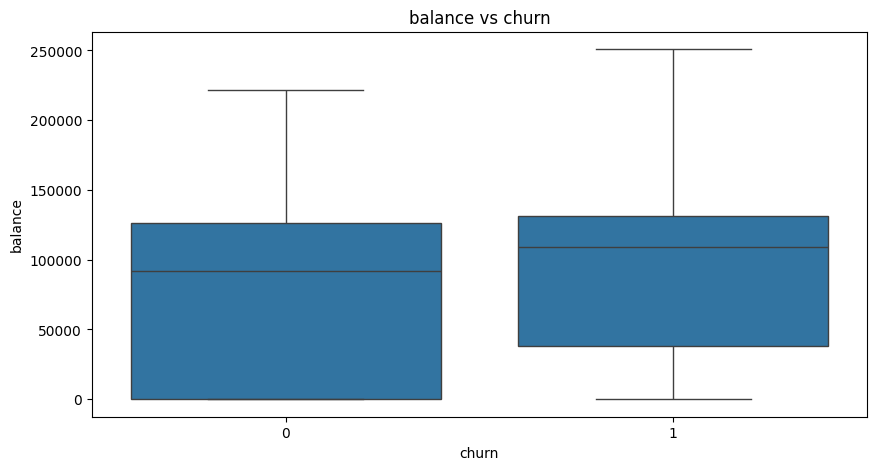

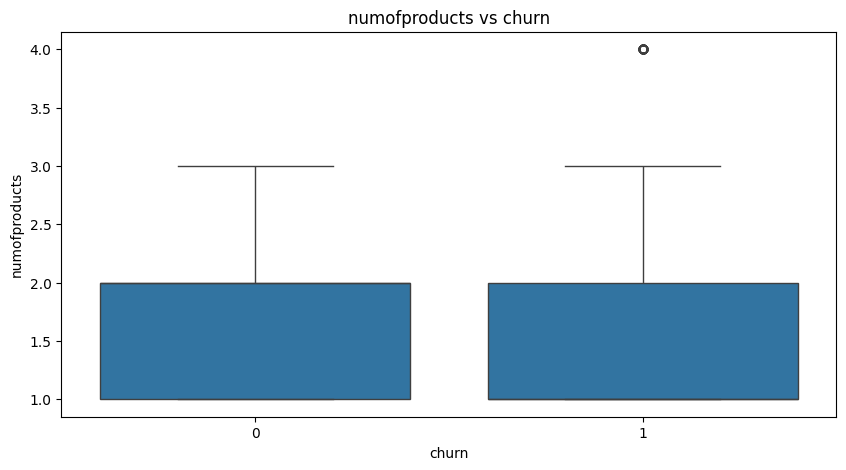

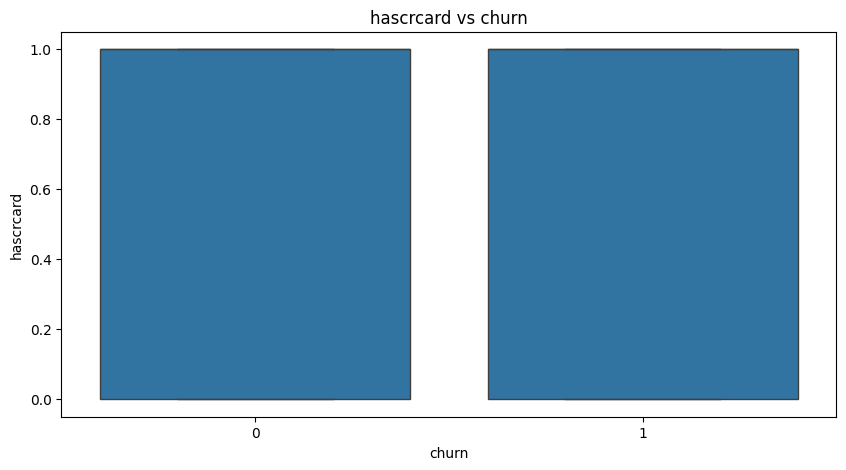

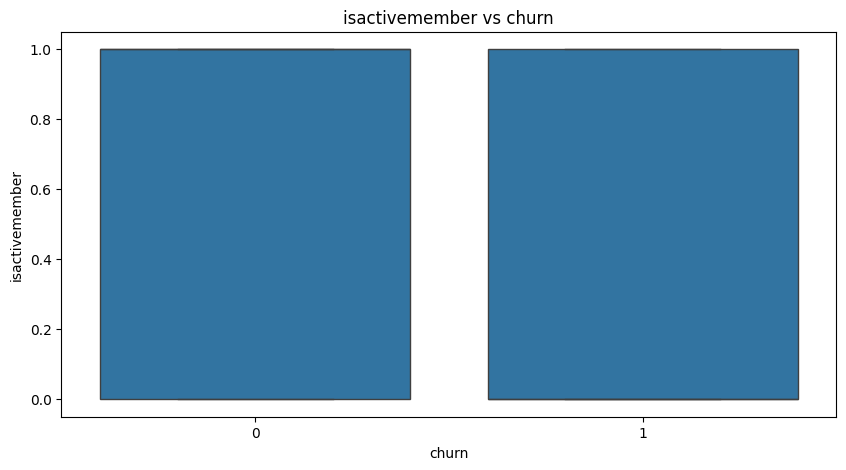

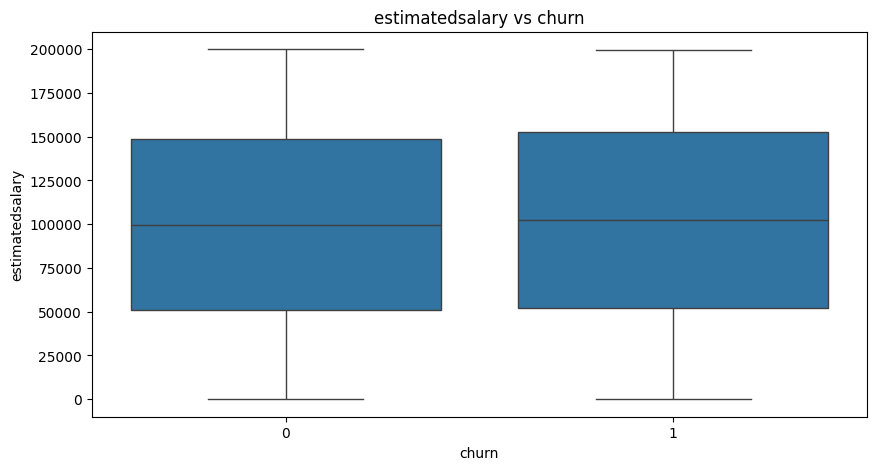

In [18]:
# Analyzing Churn vs other features
target_var = 'churn'
if target_var in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=target_var)
    plt.title(f'Distribution of {target_var}')
    plt.show()

    # Check relationships between target variable and other features
    for col in df.columns:
        if col != target_var and df[col].dtype != 'object':
            plt.figure(figsize=(10, 5))
            sns.boxplot(data=df, x=target_var, y=col)
            plt.title(f'{col} vs {target_var}')
            plt.show()

In [22]:
df['Age_Group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-aged', 'Senior'])
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-aged
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged


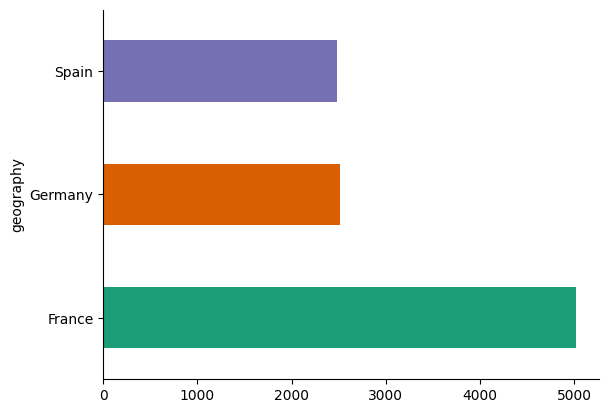

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

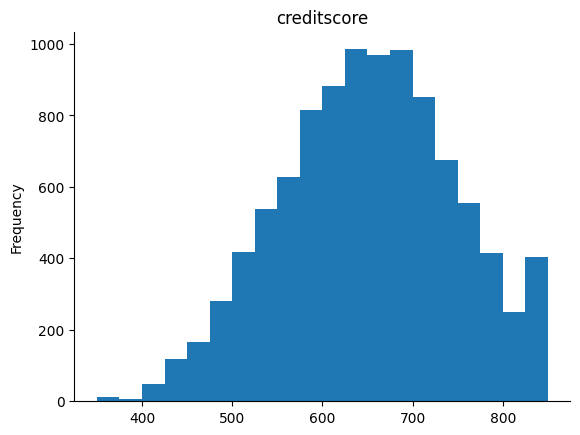

In [27]:
from matplotlib import pyplot as plt
df['creditscore'].plot(kind='hist', bins=20, title='creditscore')
plt.gca().spines[['top', 'right',]].set_visible(False)